# Fundamental analysis using Regression


This module would introduce us to the Regression related inferences to be drawn from the data.

Regression is basically a statistical approach to find the relationship between variables. 

In machine learning, this is used to predict the outcome of an event based on the relationship between variables obtained from the data-set. More often than not, we utilize linear regression to come up with an ideal inference.

We'd be using the regression model to solve the following problems:

## Problem Statements


### Problem 3.1 
Import the file `'gold.csv'` (you will find this in the intro section to download or in '/Data/gold.csv' if you are using the jupyter notebook), which contains the data of the last 2 years price action of Indian (MCX) gold standard. Explore the dataframe. You'd see 2 unique columns - 'Pred' and 'new'. One of the 2 columns is a linear combination of the OHLC prices with varying coefficients while the other is a polynomial function of the same inputs. Also, one of the 2 columns is partially filled.

* Using linear regression, find the coefficients of the inputs and using the same trained model, complete the entire column.
* Also, try to fit the other column as well using a new linear regression model. Check if the predictions are accurate. Mention which column is a linear function and which is polynomial.

(**`Hint`**: Plotting a histogram & distplot helps in recognizing the discrepencies in prediction, if any.)

**CAPM** CAPM Analysis and Beta Calculation using regression -

CAPM(Capital Asset Pricing Model) attempts to price securities by examining the relationship that exists between expected returns and risk.

Read more about CAPM. ([Investopedia CAPM reference](https://www.investopedia.com/terms/c/capm.asp))

The Beta of an asset is a measure of the sensitivity of its returns relative to a market benchmark (usually a market index). How sensitive/insensitive is the returns of an asset to the overall market returns (usually a market index like S&P 500 index). What happens when the market jumps, does the returns of the asset jump accordingly or jump somehow?

Read more about Beta ([Investopedia Beta reference](https://www.investopedia.com/investing/beta-know-risk/))

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
gold_df = pd.read_csv('GOLD.csv')
gold_df.head()

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
0,"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
1,"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
2,"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
3,"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
4,"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318


In [3]:
gold_df.shape

(512, 9)

In [4]:
gold_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 9 columns):
Date        512 non-null object
Price       512 non-null int64
Open        512 non-null int64
High        512 non-null int64
Low         512 non-null int64
Vol.        512 non-null object
Change %    512 non-null object
Pred        411 non-null float64
new         512 non-null float64
dtypes: float64(2), int64(4), object(3)
memory usage: 36.1+ KB


In [5]:
df = gold_df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 411 entries, 0 to 410
Data columns (total 9 columns):
Date        411 non-null object
Price       411 non-null int64
Open        411 non-null int64
High        411 non-null int64
Low         411 non-null int64
Vol.        411 non-null object
Change %    411 non-null object
Pred        411 non-null float64
new         411 non-null float64
dtypes: float64(2), int64(4), object(3)
memory usage: 32.1+ KB


In [13]:
X = df['new'].values
Y = df['Pred'].values

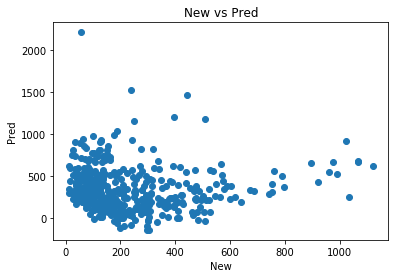

In [14]:
plt.scatter(X, Y)
plt.xlabel('New')
plt.ylabel('Pred')
plt.title('New vs Pred')
plt.show()

In [16]:
X = X.reshape(-1, 1)
Y = Y.reshape(-1, 1)

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [20]:
lr = LinearRegression()

lr.fit(X, Y)

Y_pred = lr.predict(X)

In [23]:
# Model Evaluation Metrics

rmse = mean_squared_error(Y, Y_pred)

r2 = r2_score(Y, Y_pred)

print("Mean Squared Error of the Model is:", rmse)
print('R^2 Score of the Model is:', r2)

Mean Squared Error of the Model is: 73300.46132887459
R^2 Score of the Model is: 3.732507600850976e-05


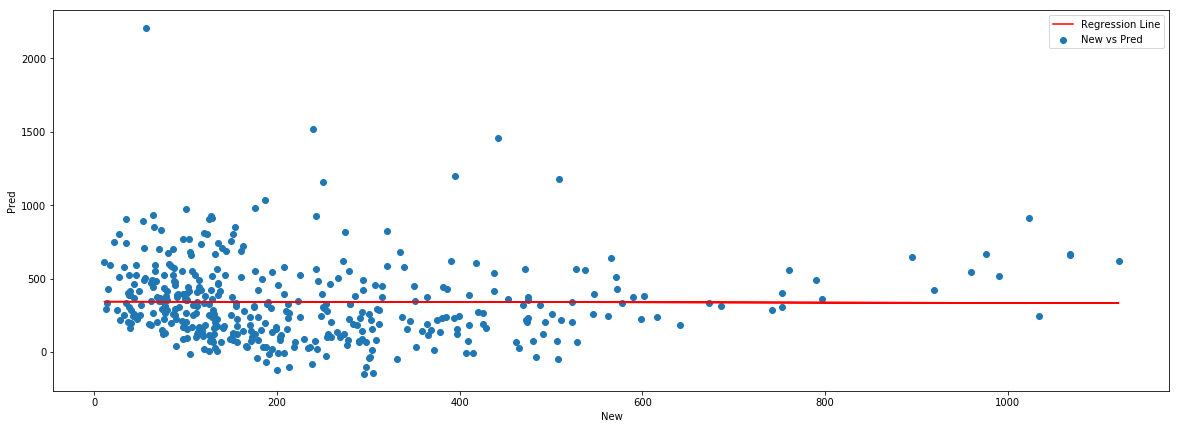

In [33]:
plt.figure(figsize=(20,7))
plt.scatter(X, Y, label = 'New vs Pred')
plt.plot(X, Y_pred, 'r', label = 'Regression Line')
plt.xlabel('New')
plt.ylabel('Pred')
plt.legend()
plt.show()

In [101]:
import numpy as np
result = gold_df.copy()

y_req = result['new'][482:512].values.reshape(-1, 1)
r = lr.predict(y_req).ravel()
result['Pred'][482:512] = list(r)



C:\Users\Jesus\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [98]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 9 columns):
Date        512 non-null object
Price       512 non-null int64
Open        512 non-null int64
High        512 non-null int64
Low         512 non-null int64
Vol.        512 non-null object
Change %    512 non-null object
Pred        441 non-null float64
new         512 non-null float64
dtypes: float64(2), int64(4), object(3)
memory usage: 36.1+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 9 columns):
Date        512 non-null object
Price       512 non-null int64
Open        512 non-null int64
High        512 non-null int64
Low         512 non-null int64
Vol.        512 non-null object
Change %    512 non-null object
Pred        441 non-null float64
new         512 non-null float64
dtypes: float64(2), int64(4), object(3)
memory usage: 36.1+ KB


ValueError: cannot convert float NaN to integer

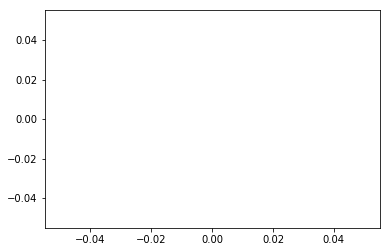

In [74]:
sns.distplot(result['Pred'])
plt.show()


### Problem 3.2 
Import the stock of your choosing AND the Nifty index.
Using linear regression (OLS), calculate -
* The daily Beta value for the past 3 months. (Daily= Daily returns)
* The monthly Beta value. (Monthly= Monthly returns)

Refrain from using the (covariance(x,y)/variance(x)) formula.

Attempt the question using regression.([Regression Reference](https://financetrain.com/calculating-beta-using-market-model-regression-slope/))

Were the Beta values more or less than 1 ? What if it was negative ?

Discuss. Include a brief writeup in the bottom of your jupyter notebook with your inferences from the Beta values and regression results